# Pymaceuticals Inc.
---

### Analysis

For mouse l509, the Capomulin treatment appeared to prove effective at reducing tumor size.
In the boxplot, Ceftamin and Infubinol are used for mice that have larger tumors, but Capomulin and Ramicane were used for smaller tumor sizes which may be indicative of the type of tumor the treatments are more effective at reducing, or that Ceftamin and Infubinol are more aggressive.
 According to the scatter plot, the larger the mouse is in size, the larger the tumor volume (mm3). The correlation coefficient is 0.84, indicating that there is strong positive correlation between mouse weight and tumor volume.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = mouse_data_complete["Mouse ID"].nunique()
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice_df = mouse_data_complete[mouse_data_complete["Mouse ID"].isin(duplicate_mouse_id) == False]

clean_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mice_df['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).mean()
median = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).median()
var = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).var()
std = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).std()
sem = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).sem()
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean,
                                   "Median Tumor Volume": median,
                                   "Tumor Volume Variance": var,
                                   "Tumor Volume Std. Dev.": std,
                                   "Tumor Volume Std. Err.": sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_aggregation = clean_mice_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

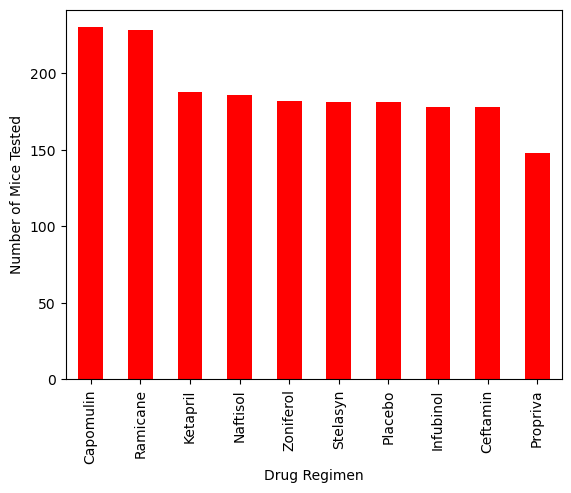

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_mice = clean_mice_df["Drug Regimen"].value_counts()
drug_mice
plot_drug_mice = drug_mice.plot.bar(color='r')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

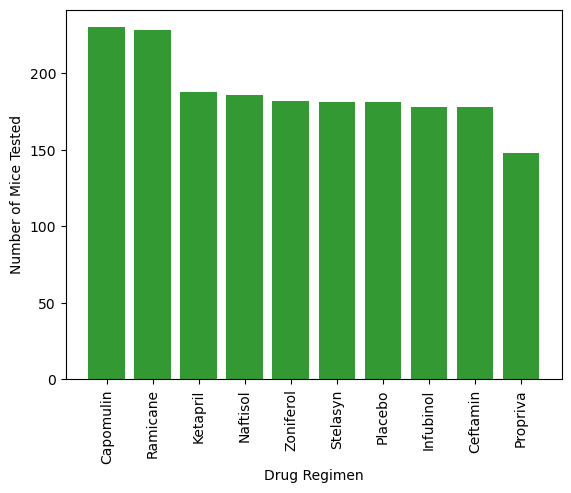

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = drug_mice.index.values
y_axis = drug_mice.values

plt.bar(x_axis, y_axis, color="g", alpha=0.8, align="center")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Mice Tested")
plt.show()


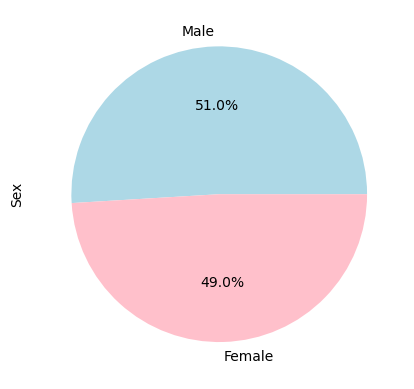

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = clean_mice_df["Sex"].value_counts()

gender_mice.plot.pie(autopct= "%1.1f%%", colors=["lightblue", "pink"])
plt.show()


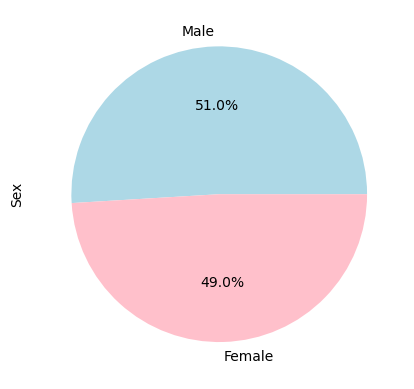

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = gender_mice.plot.pie(y='Total Count', autopct="%1.1f%%", colors=["lightblue", "pink"])
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capo_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]
rami_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane",:]
infu_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol",:]
cefta_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin",:]

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = clean_mice_df[clean_mice_df["Drug Regimen"].isin(treatment_list)]
treatments.head()
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for treatment in treatment_list:
    print(treatment)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = clean_mice_df[clean_mice_df["Drug Regimen"].isin(treatment_list)]
treatments.head()

Capomulin
Ramicane
Infubinol
Ceftamin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatments in treatment_list:
    quartiles = last_timepoint[treatments].quantile([0.25, 0.50, 0.75]).round(2)
    lower_quartile = quartiles[0.25].round(2)
    upper_quartile = quartiles[0.75].round(2)
    iqr = round(upper_quartile-lower_quartile,2)
    lower_bound = round(lower_quartile - (1.5 * iqr),2)
    upper_bound = round(upper_quartile - (1.5 * iqr),2)

    if treatment == 0:
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(f"The lower quartile of {treatments} is: {lower_quartile}")
    print(f"The upper quartile of {treatments} is: {upper_quartile}")
    print(f"The interquartile range of {treatments} is: {iqr}")
    # Determine outliers using upper and lower bounds
    print(f"The values below {lower_bound} may be {treatments} outliers")
    print(f"The values above {upper_bound} may be {treatments} outliers")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    treatment+=1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The values below 20.71 may be Capomulin outliers
The values above 28.49 may be Capomulin outliers
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The values below 17.91 may be Ramicane outliers
The values above 27.01 may be Ramicane outliers
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The values below 36.83 may be Infubinol outliers
The values above 48.31 may be Infubinol outliers
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Cefta

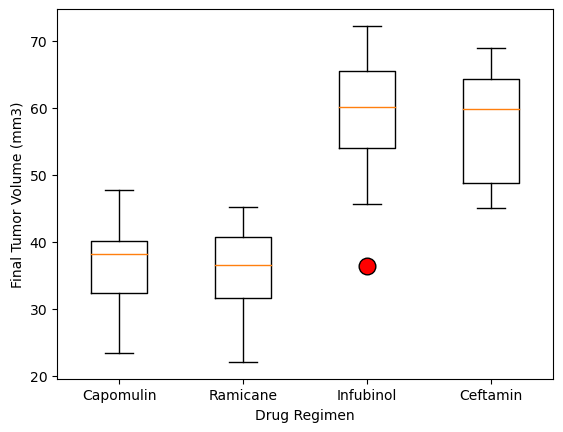

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = []
orange_out = dict(markerfacecolor="red", markersize=12)
for treatments in treatment_list:
    boxplot.append(list(last_timepoint[treatments].dropna()))
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(boxplot, labels=Regimen, flierprops=orange_out)
plt.show()
# orange_out = dict(markerfacecolor='red',markersize=12) plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out) plt.ylabel('Final Tumor Volume (mm3)') plt.show()


## Line and Scatter Plots

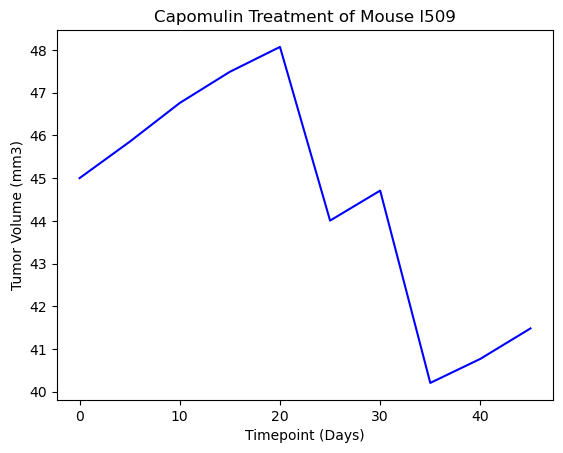

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

lineplot_df = capo_df.loc[capo_df["Mouse ID"] == "l509",:]
lineplot_df.head()
x_axis = lineplot_df["Timepoint"]
tumor_vol = lineplot_df["Tumor Volume (mm3)"]

plt.plot(x_axis, tumor_vol, color="b")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

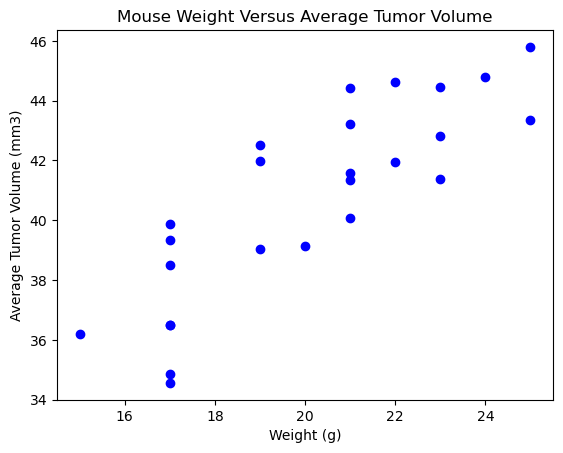

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig_1, ax_1 = plt.subplots()
scatter_tumor_avg = capo_df.groupby(["Mouse ID"]).mean()
plt.scatter(scatter_tumor_avg["Weight (g)"], scatter_tumor_avg["Tumor Volume (mm3)"], color="b")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


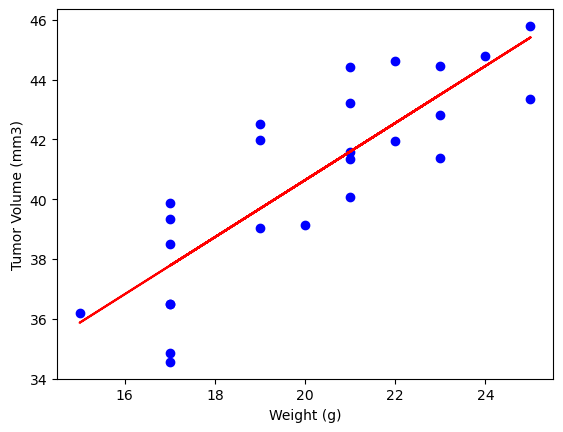

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatter_tumor_avg["Weight (g)"], scatter_tumor_avg["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_tumor_avg["Weight (g)"], scatter_tumor_avg["Tumor Volume (mm3)"])
regress = scatter_tumor_avg["Weight (g)"] * slope + intercept
line_equation = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(scatter_tumor_avg["Weight (g)"], scatter_tumor_avg["Tumor Volume (mm3)"], color="b")
plt.plot(scatter_tumor_avg["Weight (g)"], regress, color="r")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()